In [4]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr # for correlation analysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [6]:
happiness_file = pd.read_csv ('/Users/anisabraun/Downloads/world_happiness.csv')
happiness_file.columns

Index(['Country Name', 'Regional Indicator', 'Year', 'Life Ladder',
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government'],
      dtype='object')

In [45]:
#Step 3: Data Cleaning
# Extract the desired columns from whr_df
columns_to_keep = ['Country Name', 'Year', 'Life Ladder', 'Positive Affect', 'Negative Affect', 'Healthy Life Expectancy At Birth']
affect_df = happiness_file[columns_to_keep].copy()

# Rename 'Life Ladder' to 'Happiness Score'
affect_df.rename(columns={'Life Ladder': 'Happiness Score'}, inplace=True)

# Create a new column 'Affect Difference' as the difference between 'Positive Affect' and 'Negative Affect'
affect_df['Affect Difference'] = affect_df['Positive Affect'] - affect_df['Negative Affect']
affect_df

# Group data by country
grouped_affect_df = affect_df.groupby('Country Name')

# Filter out countries with less than 5 years of data
affect_df_filtered = grouped_affect_df.filter(lambda x: len(x) >= 5)

affect_df_filtered

affect_avg_df = affect_df_filtered.groupby('Country Name').mean().reset_index()
affect_avg_df

filter = happiness_file.Year == 2021
happiness_file[['Country Name', 'Life Ladder', 'Healthy Life Expectancy At Birth','Year']]
happiness_file[filter]

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
12,Afghanistan,South Asia,2021,2.436034,7.324032,0.454175,54.549999,0.394306,-0.081011,0.946299,0.178886,0.606713,0.255620
27,Albania,Central and Eastern Europe,2021,5.255482,9.583207,0.701883,69.150002,0.827453,0.041378,0.896127,0.553830,0.253654,0.472924
38,Algeria,Middle East and North Africa,2021,5.217018,9.309262,0.840710,66.599998,0.558487,-0.113483,0.711900,0.498022,0.257779,NaN
58,Argentina,Latin America and Caribbean,2021,5.908279,9.977073,0.882305,67.199997,0.819479,-0.012197,0.816257,0.684860,0.345132,0.326574
74,Armenia,Commonwealth of Independent States,2021,5.300569,9.560513,0.762044,67.650002,0.795170,-0.156326,0.705334,0.565782,0.477540,0.297146
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,Uzbekistan,Commonwealth of Independent States,2021,6.185308,8.953489,0.895504,65.300003,0.927415,0.186012,0.661562,0.698459,0.232672,0.912673
2136,Venezuela,Latin America and Caribbean,2021,5.107553,NaN,0.812418,64.050003,0.595620,NaN,0.823898,0.697587,0.389351,0.175912
2153,Vietnam,Southeast Asia,2021,5.540250,9.271268,0.799494,65.500000,0.896800,0.106941,0.797788,0.650598,0.280437,NaN
2181,Zambia,Sub-Saharan Africa,2021,3.082155,8.082337,0.619071,55.250000,0.832574,0.141230,0.824031,0.655690,0.348551,0.697678


In [67]:
gdpconf_df = happiness_file.loc[happiness_file["Year"] == 2021,["Country Name","Life Ladder","Healthy Life Expectancy At Birth"]]

gdpconf_df.head()

,Country Name,Life Ladder,Healthy Life Expectancy At Birth
12,Afghanistan,2.436034,54.549999
27,Albania,5.255482,69.150002
38,Algeria,5.217018,66.599998
58,Argentina,5.908279,67.199997
74,Armenia,5.300569,67.650002


In [68]:
gdpconf_final_df = gdpconf_df.dropna()
gdpconf_final_df

,Country Name,Life Ladder,Healthy Life Expectancy At Birth
12,Afghanistan,2.436034,54.549999
27,Albania,5.255482,69.150002
38,Algeria,5.217018,66.599998
58,Argentina,5.908279,67.199997
74,Armenia,5.300569,67.650002
...,...,...,...
2119,Uzbekistan,6.185308,65.300003
2136,Venezuela,5.107553,64.050003
2153,Vietnam,5.540250,65.500000
2181,Zambia,3.082155,55.250000


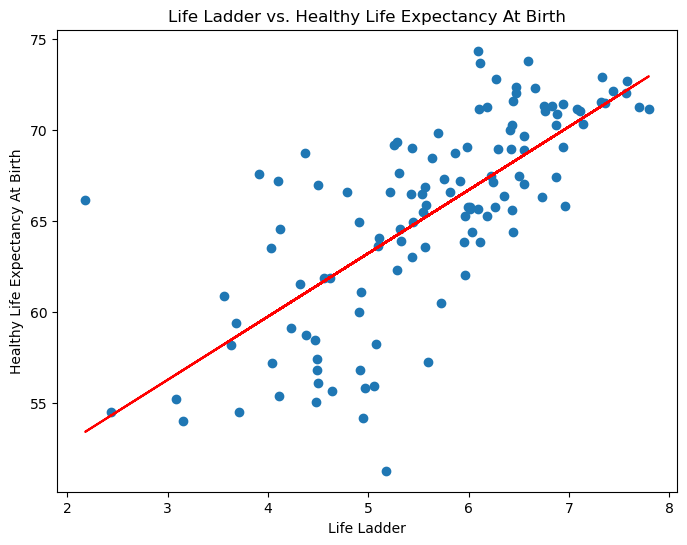

In [71]:
plt.figure(figsize=(8, 6))
plt.scatter(gdpconf_final_df['Life Ladder'], gdpconf_final_df['Healthy Life Expectancy At Birth'])
plt.xlabel('Life Ladder')
plt.ylabel('Healthy Life Expectancy At Birth')
plt.title('Life Ladder vs. Healthy Life Expectancy At Birth')

X = np.array(gdpconf_final_df['Life Ladder']).reshape((-1, 1))
y = np.array(gdpconf_final_df['Healthy Life Expectancy At Birth'])
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
plt.plot(X, y_pred, color='red')

plt.show()

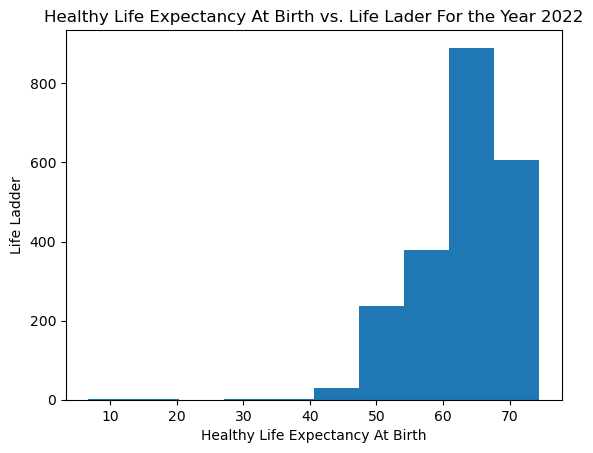

In [81]:
plt.hist(x='Healthy Life Expectancy At Birth', data=happiness_file)
plt.title("Healthy Life Expectancy At Birth vs. Life Lader For the Year 2022")
plt.xlabel("Healthy Life Expectancy At Birth")
plt.ylabel("Life Ladder")
plt.show()
